In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

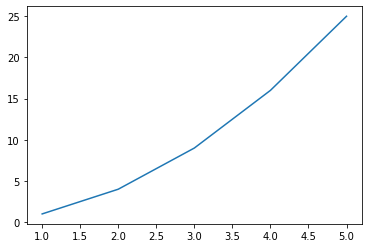

In [2]:
x = [1, 2, 3, 4, 5]
#y = [1, 4, 9, 16, 25]
y = np.array(x) ** 2
plt.plot(x, y)#xを省略した場合indexの0,1,2...が表示される

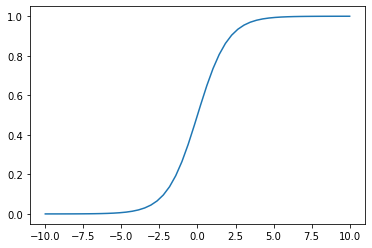

In [3]:
x = np.linspace(-10, 10)#linspaceで範囲指定。3個目に数値を入れた場合範囲をその数の分だけ分割する。
z = 1 / (1 + np.exp(-x))#expはネイピア数
plt.plot(x, z)

In [4]:
df = pd.DataFrame({'a' : [1, 2, 3, 4, 5, 6],
                   'b' : [10, 15, 40,  100, 200, 400]})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Second argument 'b' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  """Entry point for launching an IPython kernel.


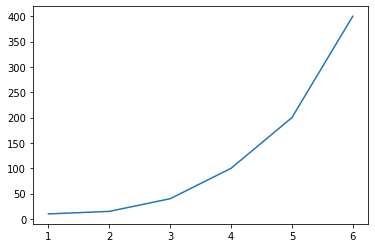

In [5]:
plt.plot('a', 'b', data = df)

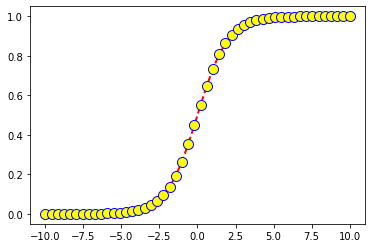

In [6]:
plt.plot(x, z,
         color = "red", #
         lw =2,#線の幅を変更することができる。
         ls = "--", #線の形状を変更することができる。
         marker='o', # markerの形の変更。xなどがある。
         markersize = 10,#markerのサイズを変更することができる。
         markerfacecolor = "yellow",# markerの色の変更ができる。
         markeredgecolor = "blue",#markerの縁の色の変更することができる。
         alpha = 1)#透明度の変更

([<matplotlib.axis.XTick at 0x7fd29d03b850>,
 <a list of 3 Text xticklabel objects>)

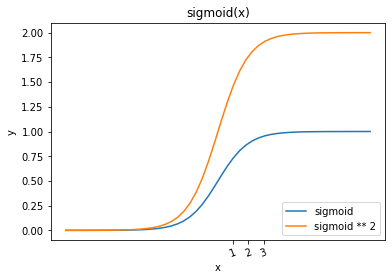

In [7]:
plt.plot(x, z, label = "sigmoid")
plt.plot(x, z * 2, label = "sigmoid ** 2")
plt.xlabel("x")#x軸にタイトルと似たようなものがつけることができる。
plt.ylabel("y")
plt.title("sigmoid(x)")#グラフ全体にタイトルをつけることができる。
plt.legend(loc=4)#複数の関数をプロットする際に役立つ。loc=でlegendの位置を指定することができる。
plt.xticks([1, 2, 3] ,rotation =20)#特定の値のみを表示することができる。


In [8]:
df = pd.read_csv("dataset/tmdb_5000_movies.csv")
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [9]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [10]:
df = df[~(pd.isna(df["release_date"]))]

In [11]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3090
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  843
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [12]:
df["release_date"] = pd.to_datetime(df["release_date"]).dt.strftime("%Y").astype(int)

In [13]:
df.groupby("release_date").count()["id"]

release_date
1916      1
1925      1
1927      1
1929      2
1930      1
       ... 
2013    231
2014    238
2015    216
2016    104
2017      1
Name: id, Length: 90, dtype: int64

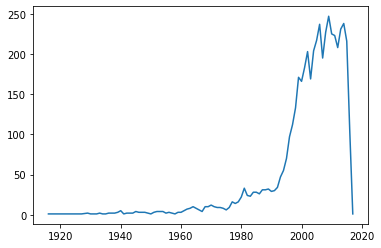

In [14]:
plt.plot(df.groupby("release_date").count()["id"])

In [15]:
df = df[df['revenue'] != 0]

In [16]:
df_median = df.groupby("release_date").median()["revenue"].astype(int)

Text(0, 0.5, 'revenue')

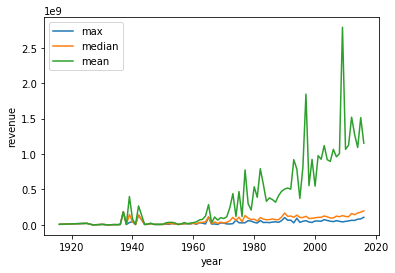

In [17]:
plt.plot(df.groupby("release_date").median()["revenue"], label="max")
plt.plot(df.groupby("release_date").mean()["revenue"], label="median")
plt.plot(df.groupby("release_date").max()["revenue"], label="mean")


plt.legend()
plt.xlabel("year")
plt.ylabel("revenue")

# 複数のplotを描画する

* plt.subplot()
* plt.figure()
* plt.subplots()

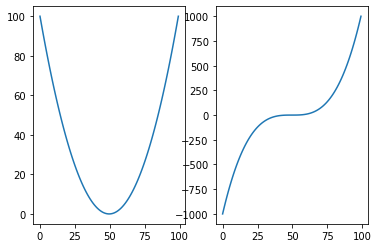

In [18]:
x = np.linspace(-10, 10, 100)
plt.subplot(1,2,1)
plt.plot(x ** 2)
plt.subplot(1,2,2)
plt.plot(x ** 3)

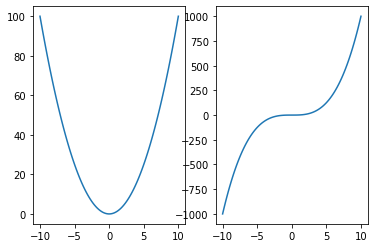

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(x, x ** 2)
ax2.plot(x, x ** 3)

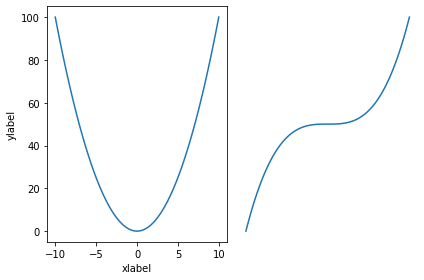

In [20]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(x, x ** 2)
axes[1].plot(x, x ** 3)
axes[0].set_xlabel('xlabel')#基本的にset_を加えれば良い（legendはそのまま）
axes[0].set_ylabel("ylabel")
axes[1].axis('off')#画像を表示する際に使用する
fig.tight_layout()

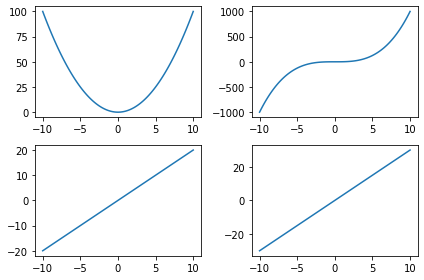

In [21]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(x, x ** 2)
axes[0, 1].plot(x, x ** 3)
axes[1, 0].plot(x, x * 2)
axes[1, 1].plot(x, x * 3)
fig.tight_layout()

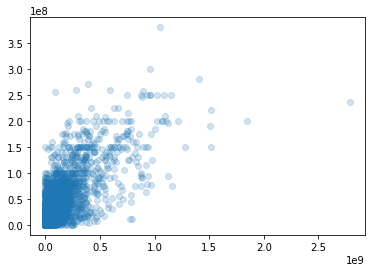

In [22]:
df = pd.read_csv("dataset/tmdb_5000_movies.csv")
plt.scatter(df["revenue"], df["budget"], alpha = 0.2)#alphaを追加することで重なっている部分が分かり易くなる

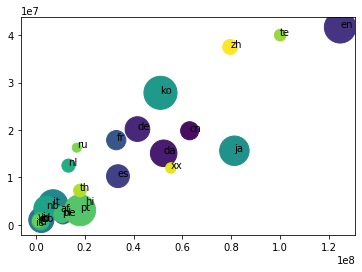

In [23]:
df = df[(df["revenue"] != 0) & (df["budget"] != 0)]
lan_group_df = df.groupby("original_language").mean()[["budget", "revenue", "vote_count"]]
c = np.arange(len(lan_group_df))
plt.scatter('revenue', 'budget', s = 'vote_count', c = c, data = lan_group_df)
for idx, row in lan_group_df.iterrows():
    plt.annotate(idx, (row["revenue"], row["budget"]))#annotateで指定した座標の中にテキストを追加することができる

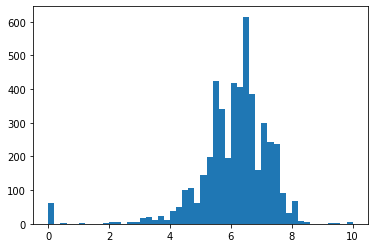

In [24]:
df = pd.read_csv("dataset/tmdb_5000_movies.csv")
plt.hist(df["vote_average"], bins = 50)
plt.show()#numpyを消すことができる

In [25]:
df = df[~(df['revenue'] == 0) | (df["budget"] == 0)]

In [26]:
df["profit"] = df.apply(lambda row : row['revenue'] - row['budget'], axis = 1)

(array([3.514e+03, 5.900e+02, 1.080e+02, 4.300e+01, 6.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-1.65710090e+08,  1.05957428e+08,  3.77624945e+08,  6.49292463e+08,
         9.20959981e+08,  1.19262750e+09,  1.46429502e+09,  1.73596253e+09,
         2.00763005e+09,  2.27929757e+09,  2.55096509e+09]),
 <a list of 10 Patch objects>)

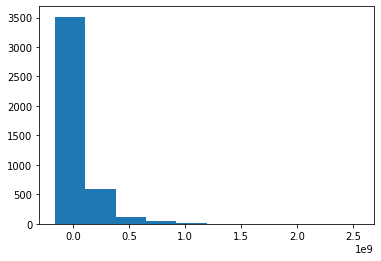

In [27]:
plt.hist(df["profit"])

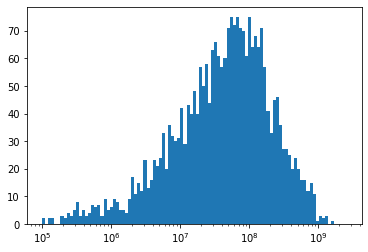

In [28]:
df = pd.read_csv("dataset/tmdb_5000_movies.csv")
fig, axes = plt.subplots()
df = df[~(df['revenue'] == 0) | (df["budget"] == 0)]
df["profit"] = df.apply(lambda row : row['revenue'] - row['budget'], axis = 1)
logbins = np.logspace(5, np.log10(df["profit"].max()), 100)
axes.hist(df["profit"], bins = logbins)
axes.set_xscale('log')
plt.show()

<BarContainer object of 3 artists>

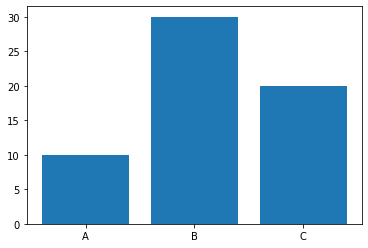

In [29]:
df = pd.DataFrame({'categorical':['A', 'B', 'C'], 'val':[10, 30, 20]})
plt.bar("categorical", "val", data = df)

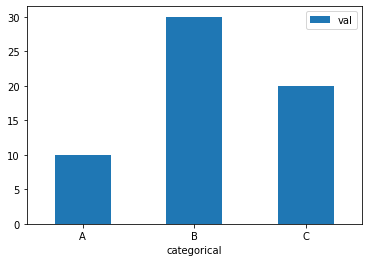

In [30]:
df.plot("categorical", "val", kind = "bar",  rot = 0)

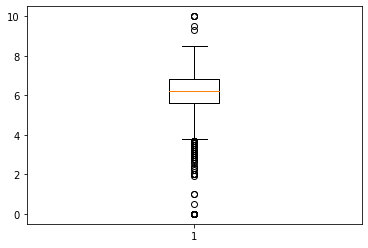

In [31]:
df = pd.read_csv("dataset/tmdb_5000_movies.csv")
plt.boxplot(df['vote_average'])
plt.show()

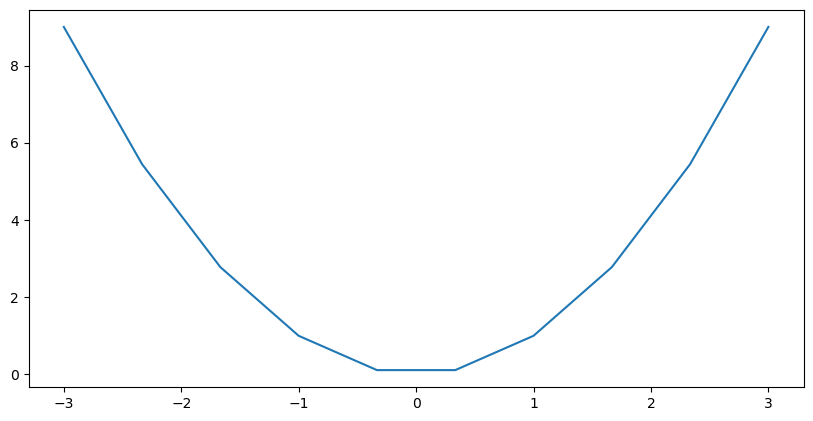

In [32]:
x = np.linspace(-3, 3, 10)
plt.figure(figsize = (10, 5), dpi = 100)
plt.plot(x, x ** 2)

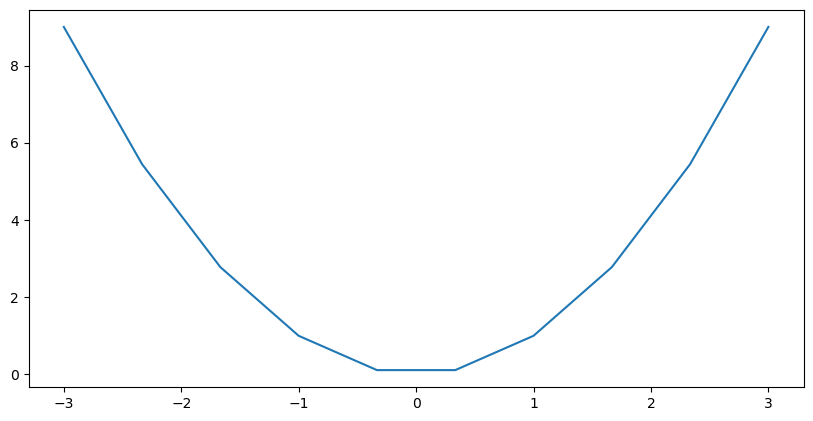

In [33]:
fig, axes = plt.subplots(figsize = (10, 5), dpi = 100)
axes.plot(x, x ** 2)

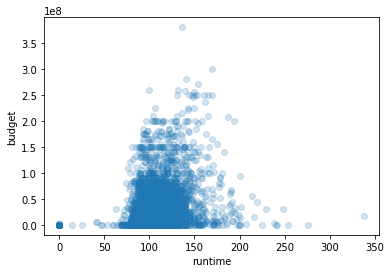

In [34]:
plt.scatter("runtime", "budget", data = df, alpha = 0.2)
plt.xlabel("runtime")
plt.ylabel("budget")
plt.savefig("runtime_budget_scatter.png")#pngファイルでの保存

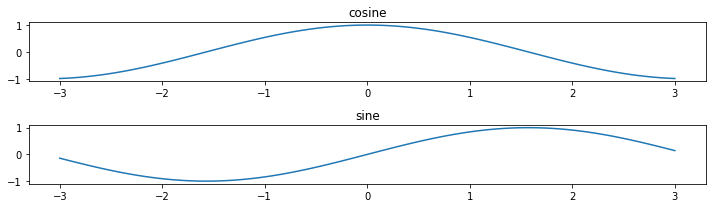

In [39]:
fig, axes = plt.subplots(2, 1, figsize = (10, 3))

x= np.linspace(-3, 3, 100)
axes[0].plot(x, np.cos(x))
axes[1].plot(x, np.sin(x))
axes[0].set_title('cosine')
axes[1].set_title('sine')
fig.tight_layout()
fig.savefig("sine_cosine")

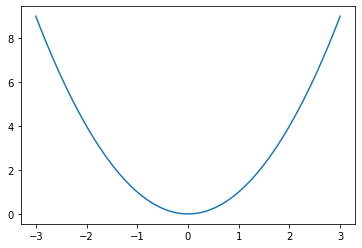

In [44]:
#PDFファイルの保存（まとめて）
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages("pdf_files.pdf")

fig, axes = plt.subplots()
axes.plot(x, x ** 2)
pdf.savefig(fig)
pdf.close()

In [41]:
pdf